# The Science of Stolen Data
&nbsp;By Emma Adelmann<br>

* **Problem**: The prevalence of large-scale data breaches and their far-reaching effects
* **Background**: <br>
&emsp;&emsp;
A *data breach* is the exposure of data to parties who are not authorized to access it. A data breach can be caused by digital vulnerabilities, but may also be caused by the direct actions of humans (for example, theft or human error). Culprits include "accidental insiders" -- those who may stumble across confidential data without having the proper permissions to view it. Even an accidental viewing of the secret data is considered a breach. In some cases, a device containing the data may be lost or stolen. There are also malicious insiders and outsiders who aim to access confidential data, possibly using it to harm a company and its customers [3]. For the average user, credentials and personal information may be made available to the public, leaving them vulnerable to hackers.<br>
&emsp;&emsp;
In the United States, if a data breach of an entity exposes any personally identifiable information belonging to users, then the entity is required by law to disclose the breach and notify the affected users [5]. After the breach, the victim can do little to take back the information that has been leaked. However, they may harden their security to make such an attack less likely in the future.
* **Questions**:
    - Who/what is the primary culprit behind data breaches?
    - When it comes to data security (weighing both the frequency and magnitude of incidents), should an organization bolster their physical security in order to protect digital assets?
    - Does a breach typically take place over a long or short period of time?
* **Justification**: <br>
&emsp;&emsp;
In 2019, the average cost of cleaning up a data breach was over 8 million dollars -- with the healthcare industry being hit the hardest [4]. When we consider the sometimes priceless nature of data, we can understand that a data breach is clearly something that governments, organizations, and end users would wish to prevent. However, in order to do so, we must find out who or what is resposible for the majority of breaches. Once we have this information, we can harden our systems and introduce new security policies to lower the likelihood of a breach.<br>
&emsp;&emsp;
It is becoming increasingly clear that physical security is innately intwined with cybersecurity. The US Cybersecurity & Infrastructure Security Agency recommends the use of a "holistic" approach to physical security and cybersecurity, as opposed to a "siloed" approach in which they are treated as two separate responsibilities (leading to less coordination within the organization and more attacks) [2]. This is particularly relevant to IoT and IIoT systems, but does it also apply to data security?<br>
&emsp;&emsp;
According to IBM, it takes 280 days on average to both detect and respond to a data breach [1]. This could mean that the organization simply took a long time to find evidence of the incident, or the attacker (if any) could have had constant access to the breached information for a period of time. This extended breach could spell trouble for both the targeted organization and its users.
* **Datasets**: https://www.kaggle.com/alukosayoenoch/cyber-security-breaches-data
* **Explanation of the Data**: This dataset describes over 1000 data breaches taking place from 1997 to 2014. It includes information on the location of the breached info, affected parties, type of breach, and when it took place. 
* **Ethical Concerns/Considerations**:
    - As defenders gain more information about the state of cybersecurity, so too do attackers. However, the information must remain accessible to increase the chances of more "good guys" and good-guys-in-training coming across it.
    - In many cases, data from a breach is leaked on the internet. Services like https://haveibeenpwned.com exist to search for compromised emails and passwords. You can also find dumps of leaked information through a simple Google search. No sensitive data is included in this dataset -- it is theoretically possible to look up the incident using the provided details and then trying to locate the leaked data, but I do not see this being a significant issue. There is usually no real need for a hacker to look up a specific incident, and it is public information anyway.
    - Organizations named in this dataset may experience damage to their reputations. This is unavoidable since they had to make their incident public in the first place. Analyzing such data allows us to better understand how and why data breaches occur, helping to prevent them from happening in the future.<br><br>

**Sources**:<br>
[1] “Cost of a Data Breach Study,” IBM, 2020. [Online]. Available: https://www.ibm.com/security/data-breach. [Accessed: 30-Apr-2021]. <br>
[2] “Cybersecurity and Physical Security Convergence,” Cybersecurity & Infrastructure Security Agency. [Online]. Available: https://www.cisa.gov/sites/default/files/publications/Cybersecurity%20and%20Physical%20Security%20Convergence_508_01.05.2021.pdf. [Accessed: 30-Apr-2021]. <br>
[3] Kaspersky, “How Data Breaches Happen,” www.kaspersky.com, 26-Apr-2021. [Online]. Available: https://www.kaspersky.com/resource-center/definitions/data-breach. [Accessed: 30-Apr-2021]. <br>
[4] M. Puranik, “What Is The Cost Of A Data Breach?,” Forbes, 02-Dec-2019. [Online]. Available: https://www.forbes.com/sites/forbestechcouncil/2019/12/02/what-is-the-cost-of-a-data-breach/. [Accessed: 30-Apr-2021]. <br>
[5] P. Greenberg, “Security Breach Notification Laws,” National Conference of State Legislatures, 15-Apr-2021. [Online]. Available: https://www.ncsl.org/research/telecommunications-and-information-technology/security-breach-notification-laws.aspx. [Accessed: 30-Apr-2021]. <br>

We'll start by reading in the data and taking a look at it:

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from scipy import stats

In [2]:
df = pd.read_csv("data/Cyber Security Breaches.csv")
df.head()

,Unnamed: 0,Number,Name_of_Covered_Entity,State,Business_Associate_Involved,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start,breach_end,year
0,1,0,Brooke Army Medical Center,TX,NaN,1000,10/16/2009,Theft,Paper,2014-06-30,A binder containing the protected health infor...,2009-10-16,NaN,2009
1,2,1,"Mid America Kidney Stone Association, LLC",MO,NaN,1000,9/22/2009,Theft,Network Server,2014-05-30,Five desktop computers containing unencrypted ...,2009-09-22,NaN,2009
2,3,2,Alaska Department of Health and Social Services,AK,NaN,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2014-01-23,NaN,2009-10-12,NaN,2009
3,4,3,Health Services for Children with Special Need...,DC,NaN,3800,10/9/2009,Loss,Laptop,2014-01-23,A laptop was lost by an employee while in tran...,2009-10-09,NaN,2009
4,5,4,"L. Douglas Carlson, M.D.",CA,NaN,5257,9/27/2009,Theft,Desktop Computer,2014-01-23,A shared Computer that was used for backup was...,2009-09-27,NaN,2009


I decided to do some unique value counts just to get a feel for the data:

In [3]:
u_entities = df["Name_of_Covered_Entity"].unique()
u_states = sorted(df["State"].unique())
u_breach_type = df["Type_of_Breach"].unique()
u_location = df["Location_of_Breached_Information"].unique()
u_years = sorted(df["year"].unique())

print("Number of Unique Entities:", len(u_entities))
print(f"\nUnique States/Territories: {len(u_states)}\n", u_states)
print(f"\nUnique Types of Breach: {len(u_breach_type)}\n", u_breach_type)
print(f"\nUnique Locations of Breached Information: {len(u_location)}\n", u_location)
print(f"\nUnique Years: {len(u_years)}\n", u_years)

Number of Unique Entities: 967

Unique States/Territories: 52
 ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

Unique Types of Breach: 29
 ['Theft' 'Loss' 'Other' 'Hacking/IT Incident'
 'Unauthorized Access/Disclosure ' 'Theft, Loss' 'Improper Disposal'
 'Loss, Improper Disposal' 'Theft, Other' 'Loss, Other'
 'Unauthorized Access/Disclosure'
 'Unauthorized Access/Disclosure, Hacking/IT Incident'
 'Theft, Loss, Improper Disposal'
 'Theft, Unauthorized Access/Disclosure, Hacking/IT Incident' 'Unknown'
 'Theft, Unauthorized Access/Disclosure'
 'Unauthorized Access/Disclosure, Other' 'Hacking/IT Incident, Other'
 'Unknown, Other' 'Loss, Unknown'
 'Loss, Unauthorized Access/Disclosure, Unknown'
 'Theft, Loss, Unauthorized Access/

Let's try answering the first question, using a bar graph to determine the frequency of various data breach causes.

Note: lots of small frequencies. clean this up?

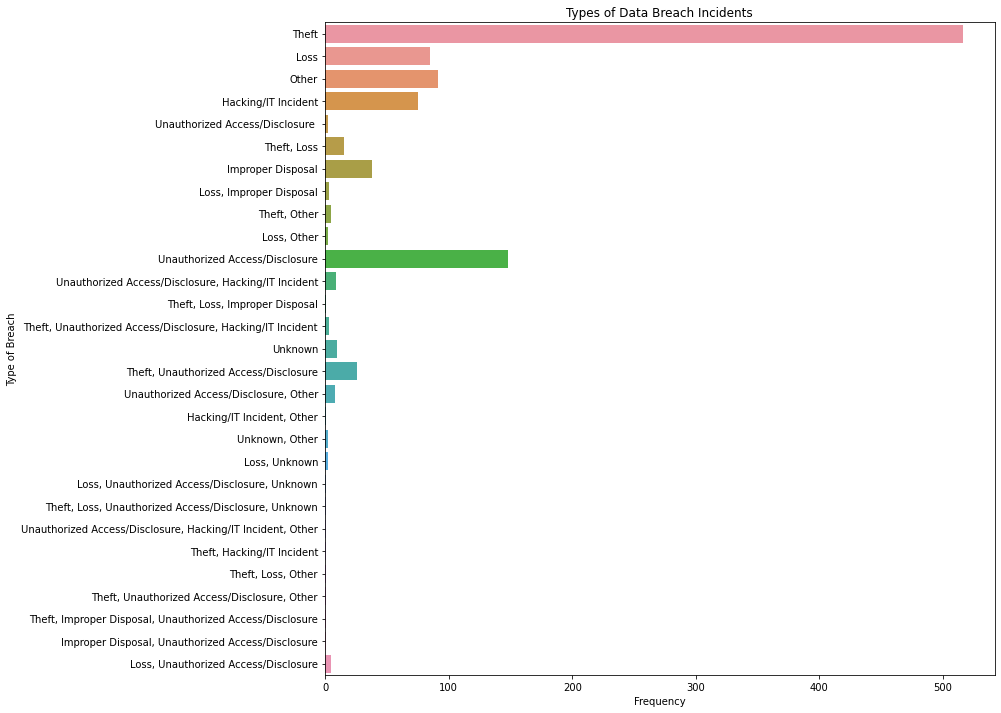

In [4]:
figure = plt.gcf()
figure.set_size_inches(12, 12)

sns.countplot(y = df["Type_of_Breach"])
plt.xlabel('Frequency')
plt.ylabel('Type of Breach')
plt.title('Types of Data Breach Incidents')
plt.show()

How about a pie chart? **NOTE**: Running this part requires Node.js and the plotly-extension to be installed, which was a bit of a process: https://stackoverflow.com/questions/54936125/plotly-gives-an-empty-field-as-output-in-jupyter-lab. I originally tried using the Pandas and Matplotlib libraries for this, but the smaller slices were so close together that I wanted the ability to hover over each slice to reveal the values. Plus, the text isn't as messy. I'm still not really satisfied with this, though, and it is not worth the required dependencies.

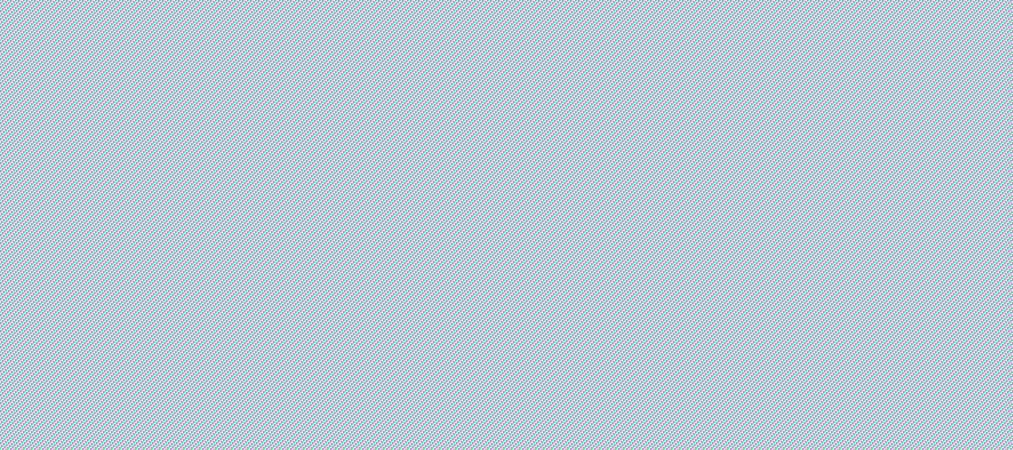

In [8]:
df_pie = pd.DataFrame(df["Type_of_Breach"].value_counts())
df_pie.rename(columns = {"Type_of_Breach" : "Frequency"}, inplace = True)
df_pie.index.name = "Type_of_Breach"
fig = px.pie(df_pie, values="Frequency", 
             names = df_pie.index, title = 'Prevelance of Different Breach Types')
fig.show()

TODO: For both bar graph and pie chart, count combination types (ex: "Theft, Loss") as both types at once instead of their own category. This should make the graphs easier to read.

In [23]:
# main types: Theft, Unauthorized Access/Disclosure, Loss, Hacking/IT Incident, Improper Disposal, Other, Unknown
types = { 'Theft' : [0], 
         'Unauthorized Access/Disclosure' : [0],  
         'Loss' : [0], 
         'Hacking/IT Incident' : [0], 
         'Improper Disposal' : [0],
         'Other' : [0],
         'Unknown' : [0]
        }

for key in types:
    for breach in df["Type_of_Breach"]:
        if key in breach:
            types[key][0] += 1

graphtype_df = pd.DataFrame(types)
graphtype_df

,Theft,Unauthorized Access/Disclosure,Loss,Hacking/IT Incident,Improper Disposal,Other,Unknown
0,571,207,116,90,44,112,16


Trying the bar graph again:

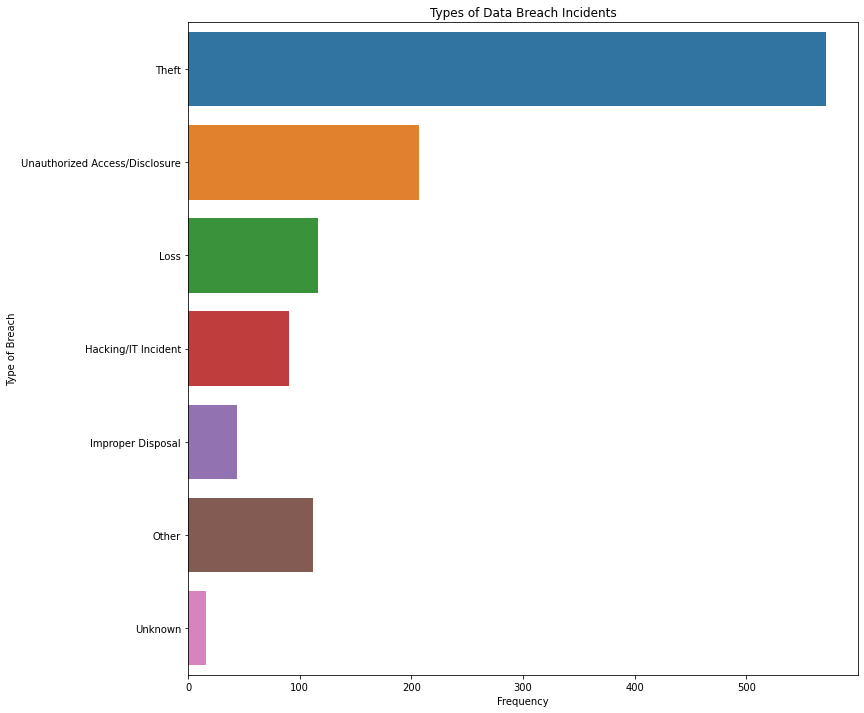

In [24]:
figure = plt.gcf()
figure.set_size_inches(12, 12)

sns.barplot(data = graphtype_df, orient = 'h')
plt.xlabel('Frequency')
plt.ylabel('Type of Breach')
plt.title('Types of Data Breach Incidents')
plt.show()

This is much easier to read. Now for the pie chart:

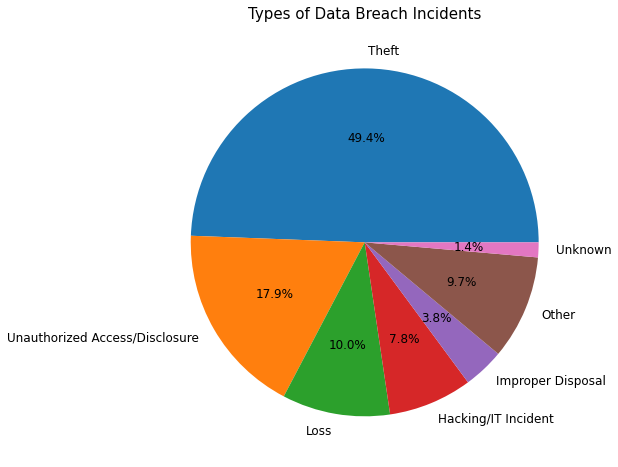

In [51]:
figure = plt.gcf()
figure.set_size_inches(8, 8)
plt.rcParams['font.size'] = 12

plt.pie(graphtype_df.iloc[0].tolist(), labels = graphtype_df.columns.values.tolist(), autopct='%1.1f%%')
plt.title("Types of Data Breach Incidents", fontsize = 15)
plt.show()

We can see here that the leading type of data breach is "Theft". A surprisingly low proportion is caused by hacking incidents.

TODO: Analyze data about breach location.